In [72]:
import pandas as pd
import numpy as np
import cobra
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from scipy.interpolate import interp1d
import requests

### Figure 2A

To create fig 2A we import the fluxes predicted by the Pheflux2.0 model and build a normalized heatmap using the pandas "apply" function, applying a lambda function that subtracts the mean from each row and then divides by the standard deviation of each row.

In [73]:
#Here we load the predicted fluxes from Pheflux as a dictionary.
folder="/home/bguzman/jupyter/UI/YMC/results/predictions_feb22_gly_tre_o2/"
T1= pd.read_csv(folder+"T1_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"],skiprows=1)
T2= pd.read_csv(folder+"T2_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"],skiprows=1)
T3= pd.read_csv(folder+"T3_Solve_Succeeded.csv" ,sep="\t",index_col=0,names=["flux"],skiprows=1)
T4= pd.read_csv(folder+"T4_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"],skiprows=1)
T5= pd.read_csv(folder+"T5_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"],skiprows=1)
T6= pd.read_csv(folder+"T6_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"],skiprows=1)
T7= pd.read_csv(folder+"T7_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"],skiprows=1)
T8= pd.read_csv(folder+"T8_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"],skiprows=1)
T9= pd.read_csv(folder+"T9_Solve_Succeeded.csv", sep="\t",index_col=0,names=["flux"],skiprows=1)
T10= pd.read_csv(folder+"T10_mean.csv",sep="\,",index_col=0,names=["flux"],skiprows=1) #The average of predictions 10 and 11 is obtained
T11= pd.read_csv(folder+"T12_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"],skiprows=1)
T12= pd.read_csv(folder+"T13_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"],skiprows=1)
T13= pd.read_csv(folder+"T14_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"],skiprows=1)
T14= pd.read_csv(folder+"T15_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"],skiprows=1)
T15= pd.read_csv(folder+"T16_Solve_Succeeded.csv",sep="\t",index_col=0,names=["flux"],skiprows=1)
#Create df
allFluxes=pd.DataFrame()
index=0
for i in [T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15]:
    index += 1
    allFluxes["T"+str(index)]=i["flux"]/abs(i).sum(axis=0)[0] #Normalization

/tmp/ipykernel_106341/3830664542.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  T10= pd.read_csv(folder+"T10_mean.csv",sep="\,",index_col=0,names=["flux"],skiprows=1) #The average of predictions 10 and 11 is obtained


In [74]:
#change columns for detailed times
time=["48.32","48.63","48.75","48.83","48.98","49.15","49.32","49.48","49.65","49.9","50.16","50.33","50.87","51.4","51.95"]
allFluxes.columns = time


Text(0.5, 50.249999999999915, 'Time (h)')

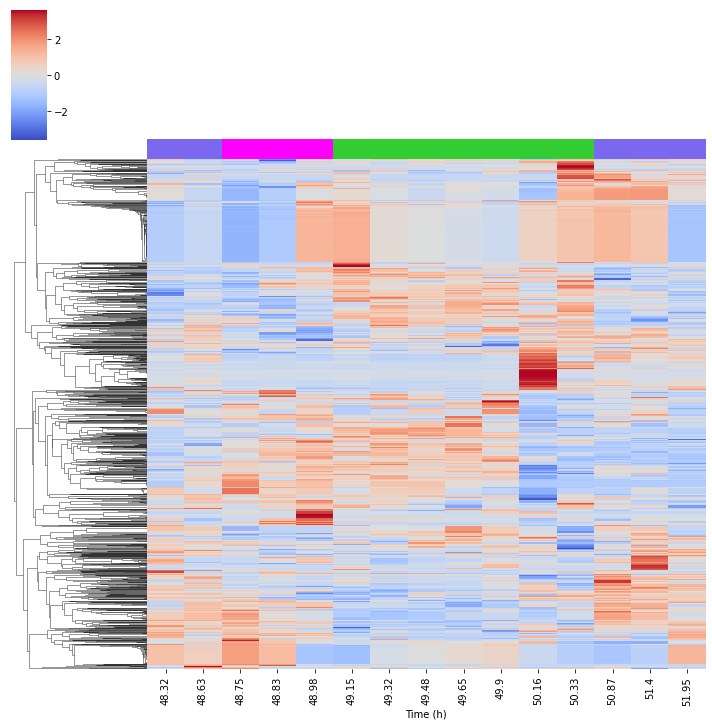

In [75]:
#Heatmap rowClust
colColors=["mediumslateblue","mediumslateblue","magenta","magenta","magenta","limegreen","limegreen","limegreen","limegreen","limegreen","limegreen","limegreen","mediumslateblue","mediumslateblue","mediumslateblue","mediumslateblue"]
allFluxes_norm=allFluxes.apply(lambda x: (x-x.mean())/x.std(), axis = 1) #Normalization
allFluxes_norm=allFluxes_norm.dropna() #Removing null or missing values in the df
ax=sns.clustermap(allFluxes_norm, cmap=sns.color_palette("coolwarm", as_cmap=True),yticklabels=False,
                  col_cluster=False,col_colors=colColors,metric="euclidean")

#Add labels to the x and y axes
ax.ax_heatmap.set_xlabel('Time (h)')
#ax.ax_heatmap.set_ylabel('Clustering of fluxes predicted')
plt.savefig("Fig2A.pdf") 

### Figure 2B and 2C

We built these figures using the predicted flux values of the different sugars present in the metabolism of *S. cerevisiae*.

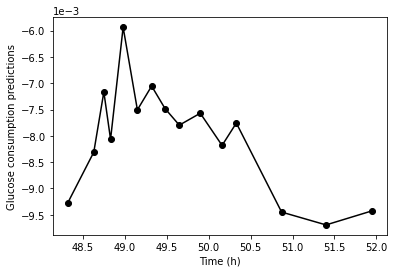

In [76]:
time2=[48.32,48.63,48.75,48.83,48.98,49.15,49.32,49.48,49.65,49.9,50.16,50.33,50.87,51.4,51.95]
#Create Glucose plot
plt.plot(time2,(allFluxes.loc["R_EX_glc__D_e"]),"o-",color="black")
plt.xlabel('Time (h)')
plt.ylabel('Glucose consumption predictions')  #[mmol/gDWcélulas/h]
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.gca().yaxis.offsetText.set_fontsize(10)
plt.savefig('Fig2B.pdf') 

Text(0, 0.5, 'Trehalose flux')

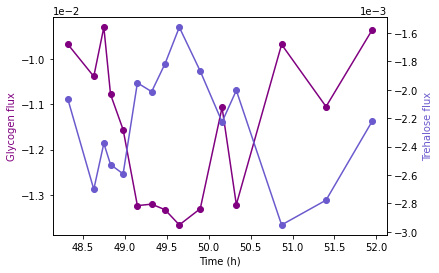

In [77]:
# Create Glycogen and Trehalose plot
fig, ax1 = plt.subplots()
x1=time2
y2=(list(allFluxes.loc["R_EX_glycogen_e"]))
y3=(list(allFluxes.loc["R_EX_tre_e"]))

#Create a plot with two different data sets that are plotted at different scales on the "y" 
#axis and share the same "x" axis (Glycogen / Trehalose)
ax2 = ax1.twinx()
ax1.plot(time2, np.array(y2), color='purple', linestyle='-', marker='o')
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # Scientific notation on the "y" axis of Glycogen flux
ax2.plot(time2, np.array(y3), color='slateblue', linestyle='-', marker='o')
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # Scientific notation on the "y" axis of Trehalose flux

#Set labels
ax1.set_xlabel('Time (h)')
ax1.set_ylabel('Glycogen flux', color='purple')
ax2.set_ylabel('Trehalose flux', color='slateblue')
plt.savefig('Fig2C.pdf') 